# The Lindblad Master Equation for Van der Pol Oscillator

The VdP oscillator's lindblad master equation is:
\begin{equation}
\begin{split}
\dot{\rho}&=\frac{1}{i\hbar}[H,\rho]\\
&-\frac{\gamma_1}{2}(1+\bar{n}(\omega))(a^\dagger a\rho+\rho a^\dagger a-2a\rho a^\dagger )-\frac{\gamma_1}{2}\bar{n}(\omega)(aa^\dagger\rho+\rho aa^\dagger-2a^\dagger\rho a)\\
&-\frac{\gamma_2}{2}(1+\bar{n}(2\omega))({a^\dagger}^2 a^2\rho+\rho {a^\dagger}^2 a^2-2a^2\rho {a^\dagger}^2)
-\frac{\gamma_2}{2}\bar{n}(2\omega)(a^2{a^\dagger}^2\rho+\rho a^2{a^\dagger}^2-2{a^\dagger}^2\rho a^2)\\
&-\frac{\kappa}{2}(1+\bar{n}(\Delta))(aa^\dagger \rho +\rho aa^\dagger-2a^\dagger\rho a)
-\frac{\kappa}{2}\bar{n}(\Delta)(a^\dagger a\rho+\rho a^\dagger a-2a\rho a^\dagger )
\end{split}
\end{equation}
where: 
* $\rho$ is the reduced density matrix.
* The Hamiltoian is $ H=\hbar\omega a^{\dagger} a $.
* $\bar{n}(\omega)$ represents the temperature dependence by $ \bar{n}(\omega)=(e^{\hbar\omega/k_B T}-1)^{-1}$. 

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import qutip

Define Constants:

In [20]:
N = 20                  # num. of levels
tN = 100                # number of time steps
omega = 1               # frequency
hbar = 1                # planck's constant
T = 0.4                 # temperature (gives nbar(omega) = 0.1)
kB = 1                  # Boltzmann constant
gamma1 = 1              # TODO
gamma2 = 0.1            # TODO
kappa  = [0, 0.5, 1, 1.5]  # TODO
Delta  = 0.7            # TODO

Define the creation and destruction operators:

In [21]:
a = qutip.create(N)
adag = a.dag()

Define the Hamiltonian and $\bar{n}(\omega)$:

In [22]:
H = hbar*omega*adag*a
def nbar(omega):
    if T>0: return 1./np.exp(hbar*omega/kB/T - 1)
    else:   return 0

Define the density matrix at time $t=0$ and plot it. Assume the system is in the third excited level:

In [23]:
rho0 = qutip.coherent_dm(N, 3)
# fig, ax = qutip.matrix_histogram(rho0)
# plt.show()

Define the collapse operators corresponding to those qutip expects, Solve the lindblat equation to get $\rho(t)$ at a later time, and plot fock states:

In [24]:
rho_arr = list()
tlist = np.linspace(0.0, 10.0, tN)
for kap in kappa:
    #define collapse operators
    C_0 = gamma1 * (1+nbar(omega)) * a
    C_1 = gamma1 * nbar(omega) * adag
    C_2 = gamma2 * (1+nbar(2*omega)) * a*a
    C_3 = gamma2 * nbar(2*omega) * adag*adag
    C_4 = kap * (1+nbar(Delta)) * adag
    C_5 = kap * nbar(Delta) * a
    # solve master eq.
    rho_arr.append(qutip.mesolve(H, rho0, tlist, [C_0, C_1, C_2, C_3, C_4, C_5], []))

Plot fock states distribution:

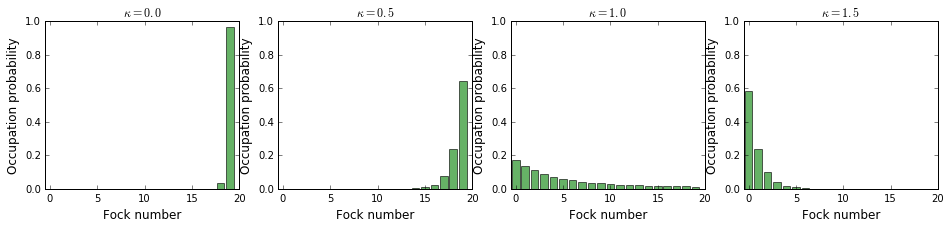

In [25]:
fig, axes = plt.subplots(1, len(kappa), figsize=(16,3))
for i,rho in enumerate(rho_arr):
    # subplot
    qutip.plot_fock_distribution(rho.states[tN-1], fig=fig, ax=axes[i], title='$\kappa=%.1f$' % kappa[i])
plt.show()

Plot Wigner functions in 2D and 3D:

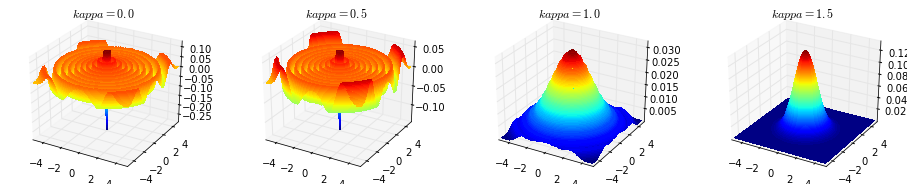

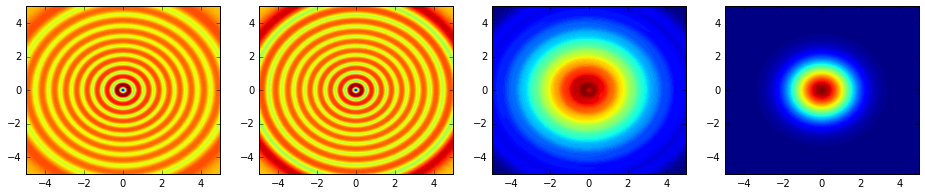

In [26]:
xvec = np.linspace(-5,5,200)
fig3, axes3 = plt.subplots(1, len(kappa), figsize=(16,3), subplot_kw={'projection':'3d'})
fig2, axes2 = plt.subplots(1, len(kappa), figsize=(16,3))
for i,rho in enumerate(rho_arr):
    # get wigner func
    W = qutip.wigner(rho.states[tN-1], xvec, xvec)
    # 3D
    cont = axes3[i].contourf(xvec, xvec, W, 100)
    lbl = axes3[i].set_title('$kappa=%.1f$' % kappa[i])
    # 2D
    cont = axes2[i].contourf(xvec, xvec, W, 100)
plt.show()

Plot position and momenta expectation values as function of time:

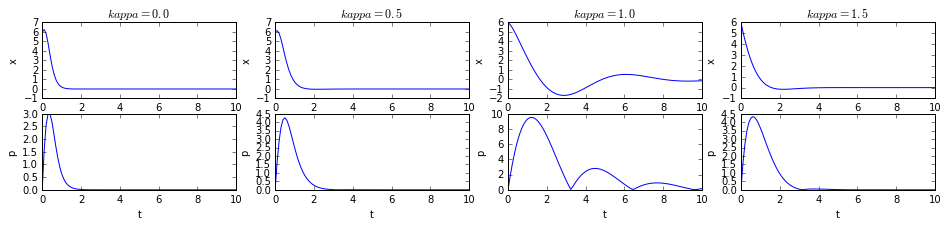

In [27]:
x = a + adag
p = -i * (a - adag) # TODO
fig, axes = plt.subplots(2, len(kappa), figsize=(16,3))
for i,rho in enumerate(rho_arr):
    # calculate expectation values
    xres, pres = qutip.expect([x, p], rho.states)
    # plot it
    axes[0][i].plot(tlist, xres)
    axes[1][i].plot(tlist, np.abs(pres)) # TODO
    axes[0][i].set_title('$kappa=%.1f$' % kappa[i])
    axes[0][i].set_ylabel('x')
    axes[1][i].set_ylabel('p')
    axes[1][i].set_xlabel('t')
plt.show()